# Visualizing BigQuery data in a Jupyter notebook

https://cloud.google.com/bigquery/docs/visualize-jupyter

# Querying and visualizing BigQuery data

## First, verify we can authenticate against a service role

In [1]:
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = \
    "/Users/willthompson/Code/wkt/msha/msha-422-18755fed4992.json"

In [2]:
from google.cloud import storage
    
# If you don't specify credentials when constructing the client, the
# client library will look for credentials in the environment.
storage_client = storage.Client()

# Make an authenticated API request
buckets = list(storage_client.list_buckets())
print(buckets)

[<Bucket: msha-test-bucket>]


In [3]:
%load_ext google.cloud.bigquery

In [4]:
%%bigquery
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


In [21]:
%%bigquery total_births
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

In [22]:
total_births

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


In [23]:
%matplotlib inline

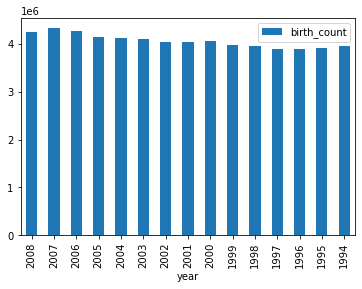

In [24]:
total_births.plot(kind='bar', x='year', y='birth_count');

In [25]:
%%bigquery births_by_weekday
SELECT
    wday,
    SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births,
    SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `bigquery-public-data.samples.natality`
WHERE wday IS NOT NULL
GROUP BY wday
ORDER BY wday ASC

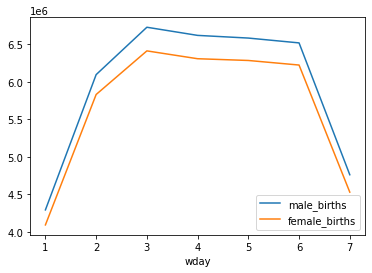

In [26]:
births_by_weekday.plot(x='wday');

# Querying and visualizing BigQuery data using pandas DataFrames

In [27]:
from google.cloud import bigquery
client = bigquery.Client()

In [28]:
sql = """
SELECT
    plurality,
    COUNT(1) AS count,
    year
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(plurality) AND plurality > 1
GROUP BY
    plurality, year
ORDER BY
    count DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,plurality,count,year
0,2,139209,2007
1,2,138866,2008
2,2,137239,2006
3,2,133285,2005
4,2,132344,2004


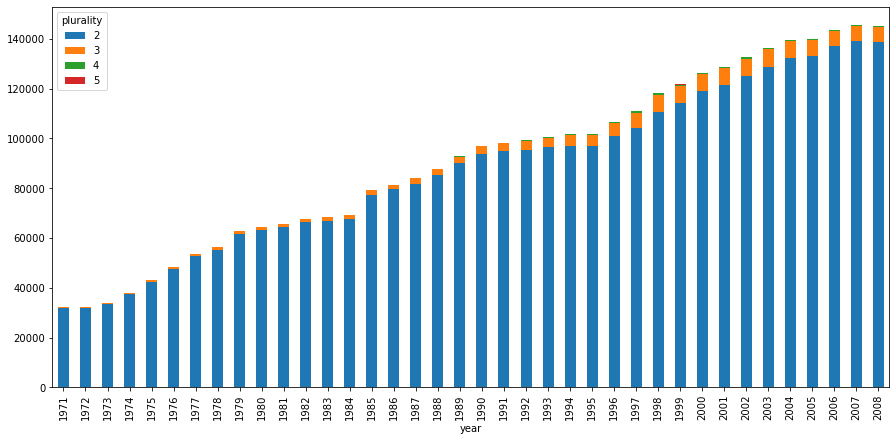

In [29]:
pivot_table = df.pivot(index='year', columns='plurality', values='count')
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7));

In [30]:
sql = """
SELECT
    gestation_weeks,
    COUNT(1) AS count
FROM
    `bigquery-public-data.samples.natality`
WHERE
    NOT IS_NAN(gestation_weeks) AND gestation_weeks <> 99
GROUP BY
    gestation_weeks
ORDER BY
    gestation_weeks
"""
df = client.query(sql).to_dataframe()

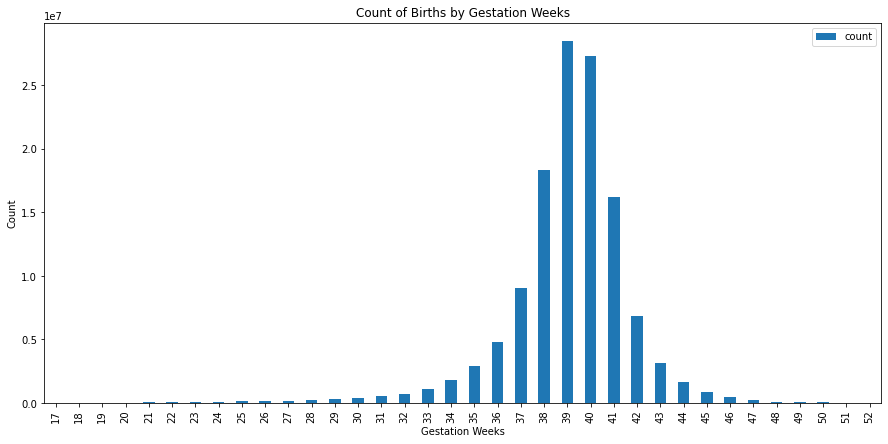

In [31]:
ax = df.plot(kind='bar', x='gestation_weeks', y='count', figsize=(15,7))
ax.set_title('Count of Births by Gestation Weeks')
ax.set_xlabel('Gestation Weeks')
ax.set_ylabel('Count');